In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\user\\Desktop\\데이터 분석\\datasets\\시도별 전출입 인구수.xlsx', header=0)

In [7]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [9]:
# 누락 값을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [10]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


# 서울 -> 경기도 인구 이동 시각화

In [11]:
s_to_g = df_seoul.loc['경기도']

s_to_g.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

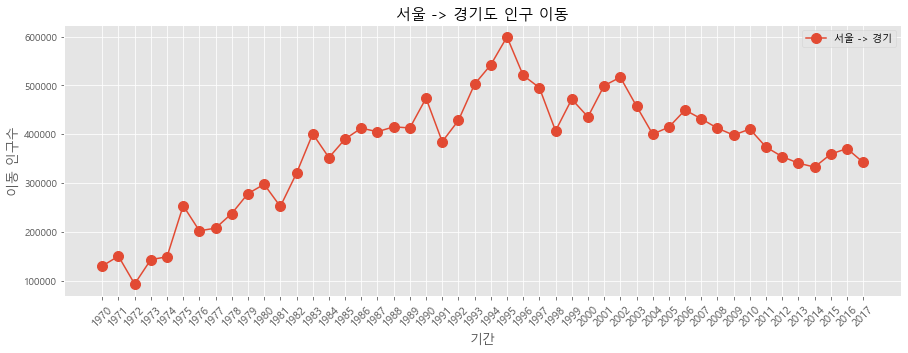

In [29]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.plot(s_to_g.index, s_to_g.values, marker='o', markersize=10)

plt.title('서울 -> 경기도 인구 이동', size=15)
plt.xlabel('기간', size=13)
plt.ylabel('이동 인구수', size=13)
plt.xticks(size=11, rotation=45)
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

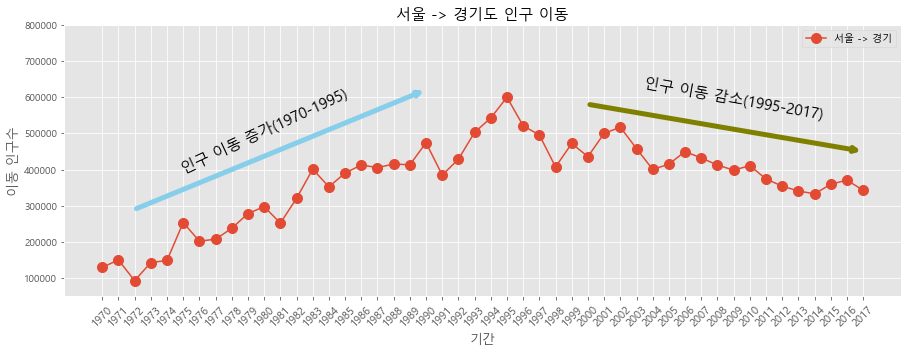

In [40]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.plot(s_to_g.index, s_to_g.values, marker='o', markersize=10)

plt.title('서울 -> 경기도 인구 이동', size=15)
plt.xlabel('기간', size=13)
plt.ylabel('이동 인구수', size=13)
plt.xticks(size=11, rotation=45)
plt.legend(labels=['서울 -> 경기'], loc='best')


plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20, 620000),   # 화살표 머리 좌표
            xytext=(2, 290000), # 화살표 꼬리 좌표
            xycoords='data', # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5) # 화살표 서식
            )

plt.annotate('',
            xy=(47, 450000),   # 화살표 머리 좌표
            xytext=(30, 580000), # 화살표 꼬리 좌표
            xycoords='data', # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='olive', lw=5) # 화살표 서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
            xy=(10, 390000),  # 텍스트 위치 기준점
            rotation=25,  # 텍스트 회전 각도
            va='baseline',  # 텍스트 상하 정렬
            ha='center',  # 텍스트 좌우 정렬
            fontsize=15,
            )

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
            xy=(39, 540000),  # 텍스트 위치 기준점
            rotation=-10,  # 텍스트 회전 각도
            va='baseline',  # 텍스트 상하 정렬
            ha='center',  # 텍스트 좌우 정렬
            fontsize=15,
            )

plt.show()

# 서울 -> 충남, 경북, 강원 인구 이동 시각화

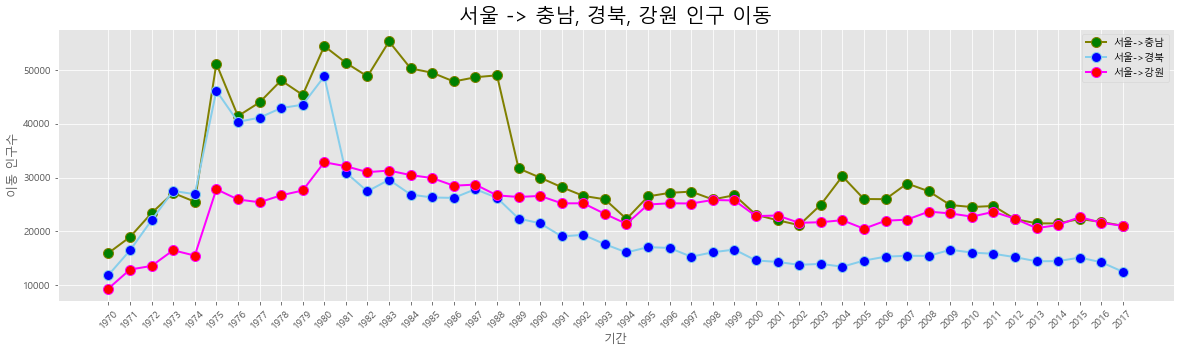

In [43]:
col_years = list(map(str, range(1970, 2018)))
df_2 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_2.loc['충청남도', :], marker='o', markerfacecolor='green',
       markersize=10, color='olive', linewidth=2, label='서울->충남')
ax.plot(col_years, df_2.loc['경상북도', :], marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax.plot(col_years, df_2.loc['강원도', :], marker='o', markerfacecolor='red',
       markersize=10, color='magenta', linewidth=2, label='서울->강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(col_years, rotation=45)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

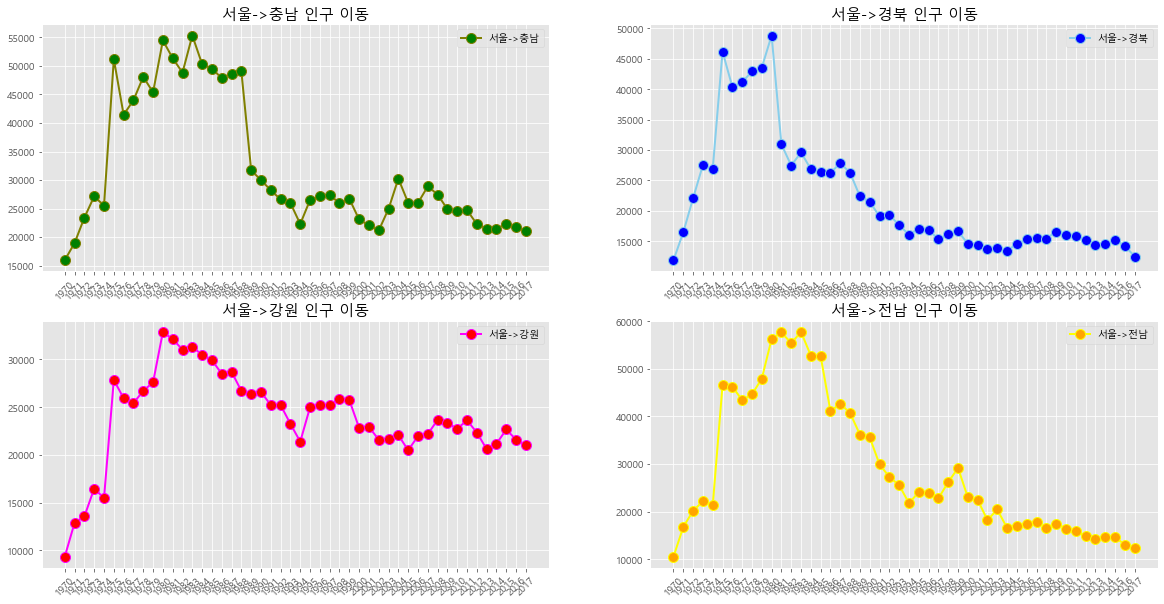

In [50]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울->충남')
ax2.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax3.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울->강원')
ax4.plot(col_years, df_3.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울->전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구 이동', size=15)
ax2.set_title('서울->경북 인구 이동', size=15)
ax3.set_title('서울->강원 인구 이동', size=15)
ax4.set_title('서울->전남 인구 이동', size=15)

ax1.set_xticklabels(col_years, rotation=45)
ax2.set_xticklabels(col_years, rotation=45)
ax3.set_xticklabels(col_years, rotation=45)
ax4.set_xticklabels(col_years, rotation=45)

plt.show()